## Data Warehouse - Semester Project
**Blood Banks - Data Warehouse**

------

**Connection**
Connect *SQL Server*  with  *Jupyter Notebook*

In [7]:
import pyodbc
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [8]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=DESKTOP-LF6ARI5;'
                      'Database=GlobalBloodBank;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
print('Connected!')

Connected!


### Query 2

In [9]:
query2= pd.read_sql_query('SELECT COUNT(F.bloodtype_id) as RequiredBlood, B.name as Name\
                            FROM fact_table F JOIN bloodtype B on F.bloodtype_id = B.bloodtype_id, Ailment A \
                            WHERE F.ailment_id = A.ailment_id \
                            GROUP BY F.bloodtype_id, B.name \
                            ORDER BY RequiredBlood DESC', \
                            conn)

**Table**

In [10]:
query2.head()

,RequiredBlood,Name
0,257,Fresh Frozen Plasma
1,255,Red Cells Concentration
2,246,Platelets
3,242,Whole Blood


**Visualization**

<ipython-input-37-efb9efebdae8>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


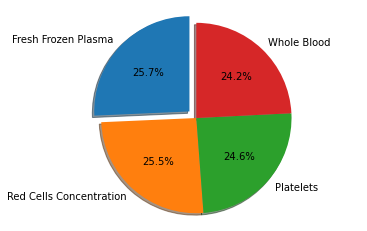

In [37]:
labels = list(query2['Name'])
sizes = query2[['RequiredBlood']]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

['Fresh Frozen Plasma', 'Red Cells Concentration', 'Platelets', 'Whole Blood']